<a href="https://colab.research.google.com/github/AasthathecoderX/Edunet_Energy/blob/main/Edunet_SolarPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace '/path/to/your/dataset.csv' with the actual path to your file in Google Drive
# Example: '/content/drive/MyDrive/data/my_dataset.csv'
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Solar power plant dataset/2022 All zones/Final Dataset.xlsx - Sheet1.csv')
    print("Dataset loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("Error: Make sure the file path is correct and the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!


,Unnamed: 0,LAT,LON,1)All Sky Surface Shortwave Downward Irradiance,2)Clear Sky Surface Shortwave Downward Irradiance,3) All Sky Surface Albedo,4)Cloud Amount,5)Temperature at 2 Meters,6)DewFrost Point at 2 Meters,7)Precipitation Corrected Sum
0,CENTRAL ZONE,20.5,76.5,5.08,6.09,0.12,48.72,25.63,14.32,1122.64
1,NaN,20.5,77.5,5.02,6.07,0.12,51.20,26.16,14.75,1347.86
2,NaN,20.5,78.5,4.95,6.04,0.12,52.62,26.62,15.56,1580.24
3,NaN,20.5,79.5,4.92,6.03,0.12,51.12,26.72,15.95,1790.41
4,NaN,20.5,80.5,4.93,6.10,0.13,52.16,25.62,16.40,1643.39


In [ ]:
display(df.isnull().sum())

,0
Unnamed: 0,382
LAT,0
LON,0
1)All Sky Surface Shortwave Downward Irradiance,0
2)Clear Sky Surface Shortwave Downward Irradiance,0
3) All Sky Surface Albedo,0
4)Cloud Amount,0
5)Temperature at 2 Meters,0
6)DewFrost Point at 2 Meters,0
7)Precipitation Corrected Sum,0


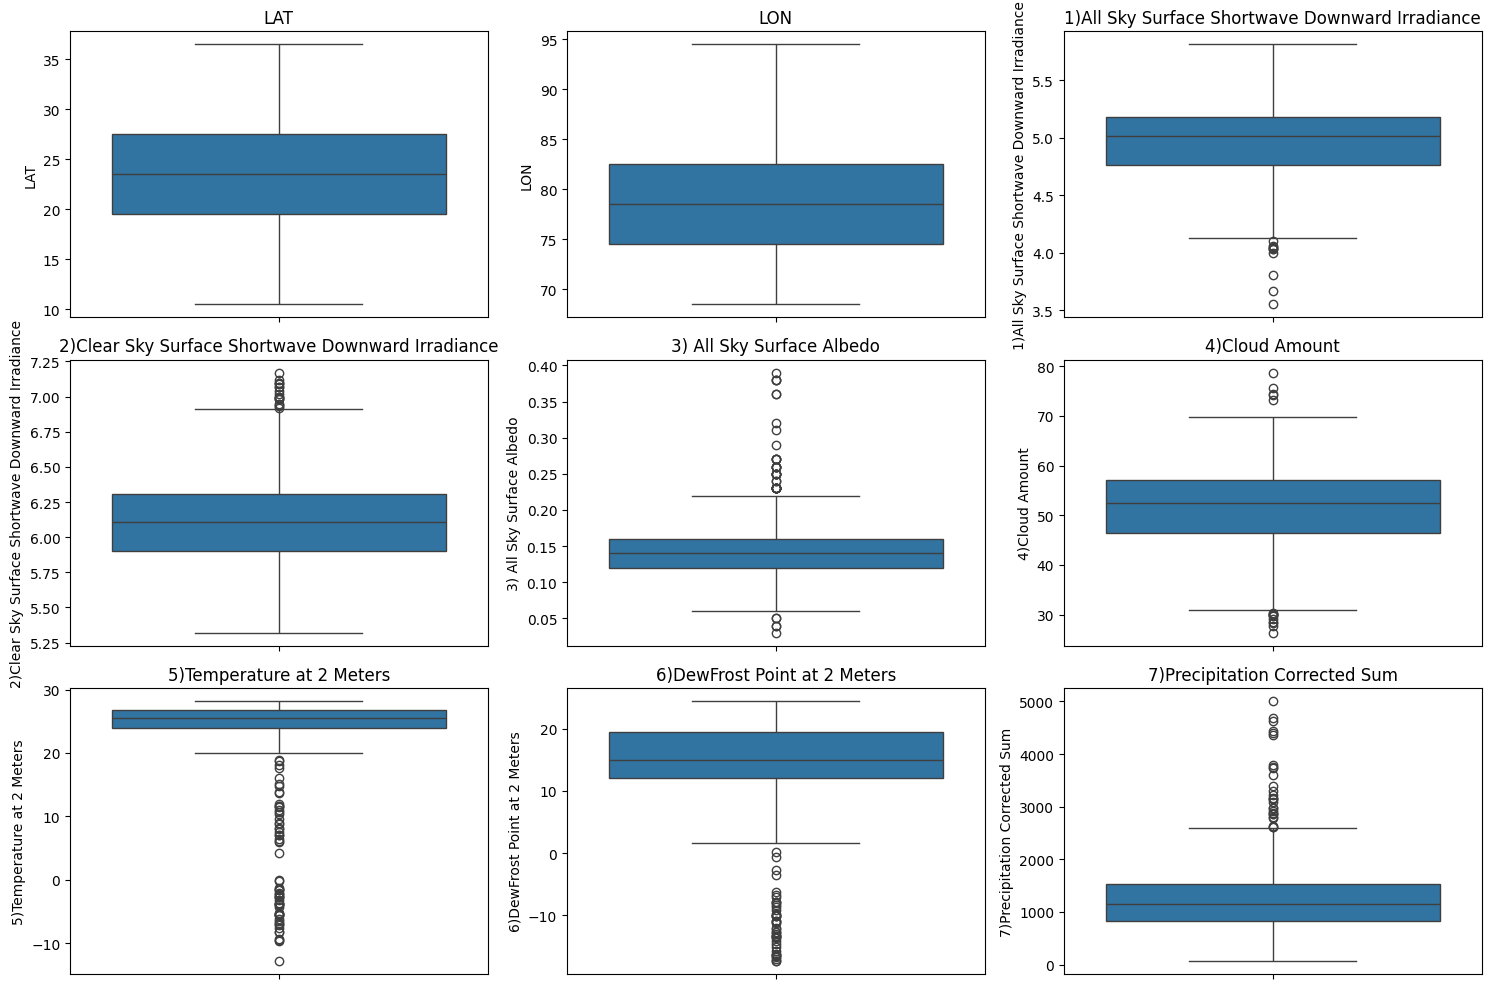

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# 1. Identify and handle the categorical column 'Unnamed: 0'.
# Since 'Unnamed: 0' seems to contain zone information and has missing values,
# we will fill the missing values with a placeholder or the previous valid entry if appropriate.
# Given the small number of non-null values, filling forward seems reasonable to propagate the zone information.
df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')

# If the column still has missing values at the beginning, fill them with a placeholder like 'UNKNOWN'
df['Unnamed: 0'] = df['Unnamed: 0'].fillna('UNKNOWN')


# Convert the categorical column to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Unnamed: 0'], prefix='Zone')


# 2. Examine the column names to identify the target variable related to solar generation.
# Based on the column names, '1)All Sky Surface Shortwave Downward Irradiance' is the most likely target variable.
target_variable = '1)All Sky Surface Shortwave Downward Irradiance'

# 3. Separate the target variable from the features.
X = df.drop(columns=[target_variable])
y = df[target_variable]

# 4. Select the numerical features for scaling.
# Exclude the newly created one-hot encoded columns and the target variable
numerical_cols_for_scaling = X.select_dtypes(include=['float64', 'int64']).columns

# 5. Apply a scaling technique (e.g., StandardScaler) to the numerical features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])

display(X.head())
display(y.head())

/tmp/ipython-input-3713970720.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')


,LAT,LON,2)Clear Sky Surface Shortwave Downward Irradiance,3) All Sky Surface Albedo,4)Cloud Amount,5)Temperature at 2 Meters,6)DewFrost Point at 2 Meters,7)Precipitation Corrected Sum,Zone_CENTRAL ZONE,Zone_EAST ZONE,Zone_NORTH ZONE,Zone_SOUTH ZONE,Zone_WEST ZONE
0,-0.464406,-0.498504,-0.043459,-0.505185,-0.285867,0.396085,0.127366,-0.208731,True,False,False,False,False
1,-0.464406,-0.342797,-0.095530,-0.505185,-0.023439,0.450880,0.170966,0.071368,True,False,False,False,False
2,-0.464406,-0.187090,-0.173635,-0.505185,0.126823,0.498437,0.253097,0.360371,True,False,False,False,False
3,-0.464406,-0.031383,-0.199671,-0.505185,-0.031904,0.508776,0.292642,0.621752,True,False,False,False,False
4,-0.464406,0.124324,-0.017424,-0.325491,0.078147,0.395051,0.338270,0.438908,True,False,False,False,False


,1)All Sky Surface Shortwave Downward Irradiance
0,5.08
1,5.02
2,4.95
3,4.92
4,4.93


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (309, 13)
Shape of X_test: (78, 13)
Shape of y_train: (309,)
Shape of y_test: (78,)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the GradientBoostingRegressor with default parameters
gbr = GradientBoostingRegressor()

# Train the model using the X_train and y_train dataframes
gbr.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Accuracy (R2): {r2*100:.2f}%")

Mean Absolute Error (MAE): 0.0806
Mean Squared Error (MSE): 0.0138
Root Mean Squared Error (RMSE): 0.1176
R-squared (R2): 0.8919
Accuracy (R2): 0.8919


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(gbr, '/content/drive/MyDrive/Colab Notebooks/solar_prediction_model.joblib')


print("Model saved successfully as 'solar_prediction_model.joblib'")

Model saved successfully as 'solar_prediction_model.joblib'
